In [47]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%y')

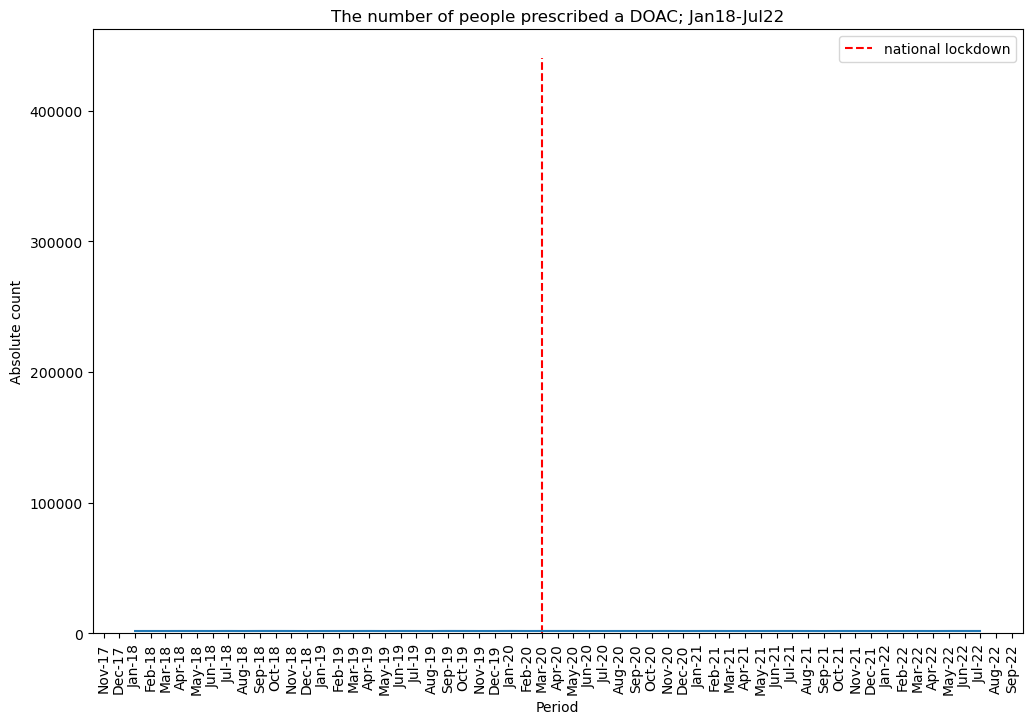

In [64]:
all_df=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "on_doac", "population"], parse_dates=["date"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(12,8), dpi=100)
plt.bar(x1_coordinates, y1_coordinates, edgecolor='white', width=1)
plt.plot(x1_coordinates, y1_coordinates)
plt.ylabel('Absolute count')
plt.xlabel('Period')
plt.title('The number of people prescribed a DOAC; Jan18-Jul22')
#
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=440000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.legend()
plt.savefig(f'../output/filtered/plot_01_all_doacs_absolute.png', bbox_inches='tight', dpi=100)
plt.show()